In [1]:
import sys
sys.path.append('C:\\Dev\\arpeggioQI\\arpeggioOne\\arpeggioOne')


from macro_lens.jupyter_utils import *
%matplotlib inline

from macro_lens.r_utils import *
%load_ext rpy2.ipython

%load_ext autoreload
%autoreload 2

from macro_lens.stats_utils import *
from macro_lens.pandas_ext import *

pd 1.4.2
xr 2022.3.0
np 1.22.3
sns 0.11.2
rpy2 version:
3.4.5
Python version:
3.9.11 (main, Mar 30 2022, 02:45:55) [MSC v.1916 64 bit (AMD64)]
Looking for R's HOME:
    Environment variable R_HOME: C:\Program Files\R\R-4.1.3\
    InstallPath in the registry: C:\Program Files\R\R-4.1.3
    Environment variable R_USER: None
    Environment variable R_LIBS_USER: None
R version:
    In the PATH: 
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:


C:\ProgramData\Anaconda3\envs\q2022\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


# yahoo

In [ ]:
#import yfinance as yf
#msft = yf.Ticker("MSFT")
#msft
#data = yf.download("SPY AAPL", start="2017-01-01", end="2022-04-30")

In [3]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [4]:
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2021-02-17,0.56,0.0
2021-05-19,0.56,0.0
2021-08-18,0.56,0.0


In [5]:
#msft.financials
#msft.quarterly_financials
#msft.major_holders
#msft.institutional_holders
#msft.recommendations
msft.news

[{'uuid': '89595aad-b799-3398-9337-ef1166ec0112',
  'title': 'Dow Jones Gains As Tech Stocks Fight; Twitter Gains As Elon Musk Takes Control; Donald Trump SPAC Craters',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/89595aad-b799-3398-9337-ef1166ec0112/dow-jones-gains-as-tech.html',
  'providerPublishTime': 1650915121,
  'type': 'STORY'},
 {'uuid': '865263b4-b1ef-3b0a-8bfc-4c3cda1089da',
  'title': 'Is Snowflake Stock A Buy Or Sell Amid Software Sector Volatility?',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/865263b4-b1ef-3b0a-8bfc-4c3cda1089da/is-snowflake-stock-a-buy-or.html',
  'providerPublishTime': 1650909947,
  'type': 'STORY'},
 {'uuid': 'd8fe16de-dd8b-357a-bd18-4f46639010b6',
  'title': "Is Microsoft Stock A Buy Before Software Giant's March-Quarter Report?",
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/d8fe16de-dd8b-357a-bd18-4f46639010b6/is-microsoft-stock-a-buy.

<AxesSubplot:xlabel='Date'>

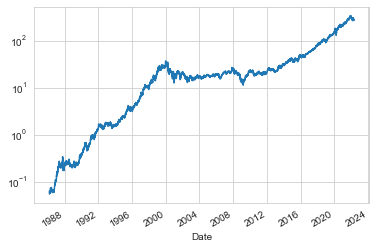

In [6]:
hist.Open.plot(logy=True)

In [7]:
ti = yf.Ticker("CL=F")
ti.info

{'exchange': 'NYM',
 'shortName': 'Crude Oil Jun 22',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'underlyingSymbol': 'CLM22.NYM',
 'quoteType': 'FUTURE',
 'symbol': 'CL=F',
 'underlyingExchangeSymbol': 'CLM22.NYM',
 'headSymbol': 'CL=F',
 'market': 'us24_market',
 'previousClose': 102.07,
 'regularMarketOpen': 101.38,
 'twoHundredDayAverage': 82.61125,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 101.55,
 'navPrice': None,
 'averageDailyVolume10Day': 251239,
 'totalAssets': None,
 'regularMarketPreviousClose': 102.07,
 'fiftyDayAverage': 102.5234,
 'trailingAnnualDividendRate': None,
 'open': 101.38,
 'toCurrency': None,
 'averageVolume10days': 251239,
 'expireDate': 1653004800,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,

# TS

In [3]:
import yfinance as yf

In [4]:
tickers = [
    "^GSPC", "SPY", "^SP500TR", 
    "^RUT", "^RUTTR", 
   # "^VIX", "^VVIX", "^MOVE", 
    "^TNX", "^TYX", 
    "CL=F", "QO=F",
    "WTID.L", "GSP", "OIL",
    "TIP",
]

#tickers = ["^GSPC", "^TNX"]

df = yf.download(
    tickers=" ".join(tickers),
    period="max",
    interval="1d",
    group_by=None,
    auto_adjust=True,
    threads=True,
    proxy=None
)
df = df.xs("Close", axis=1, level=1)
df_org = df.copy(True)

[*********************100%***********************]  13 of 13 completed


C:\ProgramData\Anaconda3\envs\q2022\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Avg Return,Period Return,Volatility,Sharpe
WTID.L,0.002525,0.366235,0.499780,0.005051
^TNX,0.055708,23.794746,0.081797,0.681058
SPY,0.095042,9.746610,0.187110,0.507945
CL=F,0.080834,0.856365,0.418010,0.193379
^RUTTR,0.000000,1.000000,NaN,NaN
QO=F,0.015655,1.076056,0.154280,0.101474
TIP,0.039310,2.001377,0.061127,0.643086
^RUT,0.069299,4.982158,0.214341,0.323314
GSP,-0.044090,0.275689,0.267974,-0.164529
OIL,-0.038543,0.303888,0.365469,-0.105463


,WTID.L,^TNX,SPY,CL=F,^RUTTR,QO=F,TIP,^RUT,GSP,OIL,^SP500TR,^TYX,^GSPC
WTID.L,1.000000,-0.142438,0.234222,0.640087,NaN,0.238091,0.078662,0.234367,0.605554,0.586501,0.233290,-0.147752,0.233091
^TNX,-0.142438,1.000000,-0.211727,-0.166177,NaN,-0.378294,0.696114,-0.206283,-0.249541,-0.195677,-0.155079,0.936757,0.017502
SPY,0.234222,-0.211727,1.000000,0.231270,NaN,0.487547,-0.167248,0.854055,0.415700,0.326639,0.983352,-0.205520,0.983353
CL=F,0.640087,-0.166177,0.231270,1.000000,NaN,0.326970,0.065239,0.221612,0.860446,0.699650,0.225774,-0.185825,0.225986
^RUTTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QO=F,0.238091,-0.378294,0.487547,0.326970,NaN,1.000000,-0.106361,0.439689,0.416214,0.302117,0.475064,-0.371953,0.475356
TIP,0.078662,0.696114,-0.167248,0.065239,NaN,-0.106361,1.000000,-0.157288,0.041428,0.059324,-0.178126,0.638083,-0.177680
^RUT,0.234367,-0.206283,0.854055,0.221612,NaN,0.439689,-0.157288,1.000000,0.388700,0.306942,0.859917,-0.195637,0.850598
GSP,0.605554,-0.249541,0.415700,0.860446,NaN,0.416214,0.041428,0.388700,1.000000,0.732571,0.413586,-0.266191,0.413711
OIL,0.586501,-0.195677,0.326639,0.699650,NaN,0.302117,0.059324,0.306942,0.732571,1.000000,0.326332,-0.208890,0.326202


<AxesSubplot:xlabel='Date'>

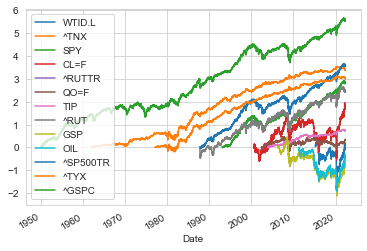

In [5]:
df = df_org.copy(True).ffill()

sel = ['^RUTTR', '^SP500TR', 'SPY', '^RUT', 'CL=F', '^GSPC',  "WTID.L", "GSP", "TIP", "OIL", "QO=F"]
df[sel] = df[sel].pct_change()

sel = ['^TNX', '^TYX']
df[sel] = -8 * df[sel].diff()/100 + df[sel].shift()/100/5/52

df = (df+1).pipe(np.log)

df = df.where(np.abs(df)<1)

df.e.plot_cum_ret()

,Avg Return,Period Return,Volatility,Sharpe
^TNX,-1.592702e-14,-5.562800e-03,15.874508,-1.003308e-15
^GSPC,1.259836e-14,-1.611534e-08,15.874508,7.936218e-16
CL=F,8.700871e-15,8.566380e-02,15.874508,5.481034e-16


,^TNX,^GSPC,CL=F
^TNX,1.000000,-0.078344,0.095294
^GSPC,-0.078344,1.000000,-0.183199
CL=F,0.095294,-0.183199,1.000000


<AxesSubplot:xlabel='Date'>

,Avg Return,Period Return,Volatility,Sharpe
^TNX,-0.300385,0.904706,0.083948,-3.578236
^GSPC,-0.395570,0.871582,0.207885,-1.902831
CL=F,0.933105,1.290829,0.559579,1.667513


,^TNX,^GSPC,CL=F
^TNX,1.000000,-0.078344,0.095294
^GSPC,-0.078344,1.000000,-0.183199
CL=F,0.095294,-0.183199,1.000000


<AxesSubplot:xlabel='Date'>

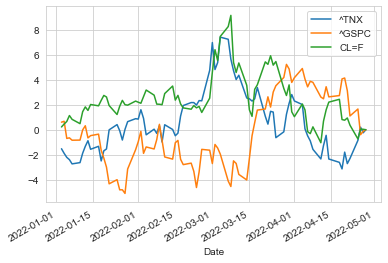

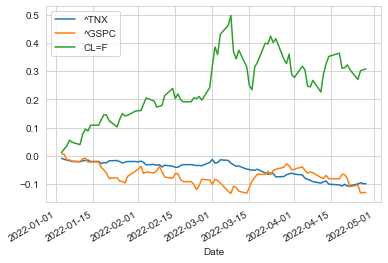

In [9]:
df[slice("2022", None)][["^TNX", "^GSPC", "CL=F"]].e.normalise().e.plot_cum_ret()
df[slice("2022", None)][["^TNX", "^GSPC", "CL=F"]].e.plot_cum_ret()

<AxesSubplot:xlabel='Date'>

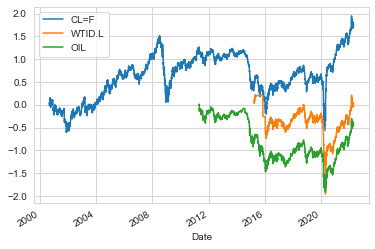

In [26]:
df[['CL=F', "WTID.L", "OIL"]].cumsum().plot()